# Uppgift 2 - KPIer & EDA

# KPI_1

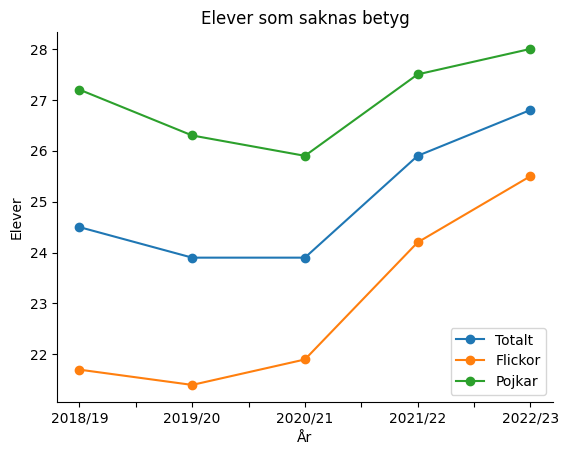

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 

df_certificate = pd.read_excel('../data/python//betyg_o_prov_riksnivå.xlsx', skiprows=7, sheet_name='Tabell 1B')
df_certificate = df_certificate.iloc[:5]
df_certificate = df_certificate.drop(columns=['Totalt' , 'Flickor', 'Pojkar' , 'Totalt.1' , 'Flickor.1', 'Pojkar.1'] , axis=1)
column_rename = {df_certificate.columns[0]: "Years", df_certificate.columns[1]: "Totalt" ,df_certificate.columns[2]: "Flickor" , df_certificate.columns[3]: "Pojkar"}
df_certificate = df_certificate.rename(columns = column_rename)

ax_certificate = df_certificate.plot(x="Years", y=["Totalt", "Flickor", "Pojkar"], marker="o")
ax_certificate.spines["top"].set_visible(False)
ax_certificate.spines["right"].set_visible(False)

plt.title('Elever som saknas betyg')
plt.xlabel('År')
plt.ylabel('Elever')  
plt.show()


### The analysis reveals a significant surge in the number of students failing to graduate post-2020. It is imperative to thoroughly review the revised teaching methodologies implemented after 2020, given their detrimental effects on educational outcomes, particularly in the aftermath of the COVID-19 pandemic.

# KPI_2

In [13]:
import plotly.express as px

df_variables = pd.read_excel('../data/python/betyg_o_prov_riksnivå.xlsx' , sheet_name="Tabell 1B" , skiprows=7)
df_variables = df_variables.drop(df_variables.index[0:12])
df_variables = df_variables.drop([14, 18, 19, 20, 21, 25, 26, 27])
df_variables = df_variables.iloc[:, [0,-2, -1]]
df_variables = df_variables.reset_index(drop=True)

df_variables = df_variables.rename(columns={df_variables.columns[0]: "Titles" , df_variables.columns[1]: 'Flickor_%' , df_variables.columns[2]: 'Pojkar_%'})

colour1 = {"Flickor_%":"#9925be", "Pojkar_%":"#2596be"}
fig =px.bar(
    df_variables.reset_index(),
    x="Titles",
    y=["Flickor_%", "Pojkar_%"],
    barmode="group",
    title="Variabler som påverkar meritvärde",
    labels={"value": "Proportion(%)", "variable": "Elevtyp"},
    color_discrete_map =colour1   
)

fig.update_layout(
    annotations=[
        dict(
            x=1,
            y=1.09,
            showarrow=False,
            font=dict(size=10)
        )
    ]
)

fig.show()

### Our analysis indicates a correlation between the rising numbers of students with foreign backgrounds and those who immigrated to Sweden after 2014, and a potential increase in students experiencing educational challenges. We recommend offering additional support and resources tailored to students with diverse cultural backgrounds to address this trend effectively.

# KPI_3

   Math  Swedish  English  SSAS
0  11.9     13.6     15.7   9.4
1  11.6     13.3     15.4     9
2  13.0     14.4     16.9  11.1
3  14.1     15.0     18.5    ..


C:\Users\Sammy Guru\AppData\Local\Temp\ipykernel_18256\3520725528.py:84: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



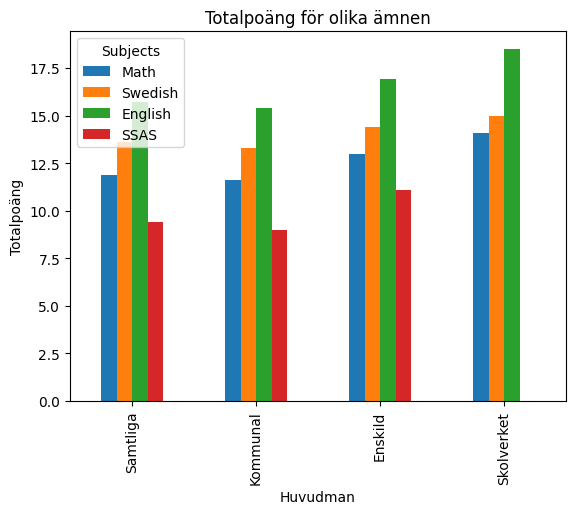

In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

# Define file path and columns to rename 
file_path = '../data/python/riket2023_åk9_np.xlsx'

df_English = pd.read_excel(file_path, skiprows=8 , sheet_name='Engelska')
df_math = pd.read_excel(file_path, skiprows=8 , sheet_name='Matematik')
df_Swedish = pd.read_excel(file_path, skiprows=8 , sheet_name='Svenska')
df_SAS = pd.read_excel(file_path, skiprows=8 , sheet_name='Svenska som andraspråk')

columns_to_rename = {
    'Engelska': {
        df_English.columns[1]: "huvudman",
        df_English.columns[2]: "Totalt (A-F)",
        df_English.columns[3]: "Flickor (A-F)",
        df_English.columns[4]: "Pojkar (A-F)",
        df_English.columns[5]: "Totalt (A-E)",
        df_English.columns[6]: "Flickor (A-E)",
        df_English.columns[7]: "Pojkar (A-E)",
        df_English.columns[8]: "Totalt (Poäng)",
        df_English.columns[9]: "Flickor (Poäng)",
        df_English.columns[10]: "Pojkar (Poäng)"
    },
    'Matematik': {
        df_math.columns[1]: "huvudman",
        df_math.columns[2]: "Totalt (A-F)",
        df_math.columns[3]: "Flickor (A-F)",
        df_math.columns[4]: "Pojkar (A-F)",
        df_math.columns[5]: "Totalt (A-E)",
        df_math.columns[6]: "Flickor (A-E)",
        df_math.columns[7]: "Pojkar (A-E)",
        df_math.columns[8]: "Totalt (Poäng)",
        df_math.columns[9]: "Flickor (Poäng)",
        df_math.columns[10]: "Pojkar (Poäng)"
    },
    'Svenska': {
        df_Swedish.columns[1]: "huvudman",
        df_Swedish.columns[2]: "Totalt (A-F)",
        df_Swedish.columns[3]: "Flickor (A-F)",
        df_Swedish.columns[4]: "Pojkar (A-F)",
        df_Swedish.columns[5]: "Totalt (A-E)",
        df_Swedish.columns[6]: "Flickor (A-E)",
        df_Swedish.columns[7]: "Pojkar (A-E)",
        df_Swedish.columns[8]: "Totalt (Poäng)",
        df_Swedish.columns[9]: "Flickor (Poäng)",
        df_Swedish.columns[10]: "Pojkar (Poäng)"
    },
    'Svenska som andraspråk': {
        df_SAS.columns[1]: "huvudman",
        df_SAS.columns[2]: "Totalt (A-F)",
        df_SAS.columns[3]: "Flickor (A-F)",
        df_SAS.columns[4]: "Pojkar (A-F)",
        df_SAS.columns[5]: "Totalt (A-E)",
        df_SAS.columns[6]: "Flickor (A-E)",
        df_SAS.columns[7]: "Pojkar (A-E)",
        df_SAS.columns[8]: "Totalt (Poäng)",
        df_SAS.columns[9]: "Flickor (Poäng)",
        df_SAS.columns[10]: "Pojkar (Poäng)"
    }
}

# Read data from all sheets with skipped 8 rows
df_all_sub = {
    sheet_name: pd.read_excel(file_path, sheet_name=sheet_name, skiprows=8)
    for sheet_name in columns_to_rename
} # Got tips from ChatGPT

# Apply renaming for each sheet
for sheet_name, columns in columns_to_rename.items():
    df_all_sub[sheet_name].rename(columns=columns, inplace=True)

# Access the desired DataFrame
df_English = df_all_sub['Engelska']
df_math = df_all_sub['Matematik']
df_Swedish = df_all_sub['Svenska']
df_SAS = df_all_sub['Svenska som andraspråk']

# Concatenate Totalt (Poäng) columns from multiple DataFrames
subject_points = pd.concat([df_math['Totalt (Poäng)'], df_Swedish['Totalt (Poäng)'], df_English['Totalt (Poäng)'], df_SAS['Totalt (Poäng)']], axis=1, keys=['Math', 'Swedish', 'English', 'SSAS'])
print(subject_points)
subject_points.replace('..',0, inplace=True)

huvudman_labels = df_Swedish['huvudman']

# plotting with bars
subject_points.plot.bar()
x_labels = huvudman_labels.reindex(subject_points.index) 

plt.xticks(range(len(x_labels)), x_labels)
#simple labeling
plt.xlabel('Huvudman')
plt.ylabel('Totalpoäng')
plt.title('Totalpoäng för olika ämnen')
plt.legend(title='Subjects')

plt.show()

### The analysis demonstrates that government-run schools exhibit higher educational outcomes, particularly regarding the proportion of students graduating with higher grades. Accordingly, we advise allocating additional support resources to private schools to enhance their educational effectiveness.